# Homework 1

James Perryman

## Dataset 1: CSV 

For this file I looked at soccer data for every country over the past 50 years.  I am curious as to what counrtries score and win more.  I also want to see the effect of a homefield advantage.

# Importing Data

First I imported the libraries

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Then I imported the dataset

In [47]:
results = pd.read_csv('C:/Users/jperryman/Desktop/results.csv')
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38759 entries, 0 to 38758
Data columns (total 8 columns):
date          38759 non-null object
home_team     38759 non-null object
away_team     38759 non-null object
home_score    38759 non-null int64
away_score    38759 non-null int64
tournament    38759 non-null object
city          38759 non-null object
country       38759 non-null object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


using .info and .head I am able to see the variables avialable in the dataset

In [48]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


# Cleaning Data

I start by dropping the variables I do not need

In [49]:
del results['date']
del results['tournament']
del results['city']
results.head()

,home_team,away_team,home_score,away_score,country
0,Scotland,England,0,0,Scotland
1,England,Scotland,4,2,England
2,Scotland,England,2,1,Scotland
3,England,Scotland,2,2,England
4,Scotland,England,3,0,Scotland


Next I create winner and loser columns using scores to quantify who won and who lost

In [50]:
def winner(row):
    if row['home_score'] > row['away_score']: return row['home_team'] 
    elif row['home_score'] < row['away_score']: return row['away_team']
    else: return 'DRAW'
    
results['winner'] = results.apply(lambda row: winner(row), axis=1)
results.head()

,home_team,away_team,home_score,away_score,country,winner
0,Scotland,England,0,0,Scotland,DRAW
1,England,Scotland,4,2,England,England
2,Scotland,England,2,1,Scotland,Scotland
3,England,Scotland,2,2,England,DRAW
4,Scotland,England,3,0,Scotland,Scotland


In [51]:
def loser(row):
    if row['home_score'] < row['away_score']: return row['home_team'] 
    elif row['home_score'] > row['away_score']: return row['away_team']
    else: return 'DRAW'
    
results['loser'] = results.apply(lambda row: loser(row), axis=1)
results.head()

,home_team,away_team,home_score,away_score,country,winner,loser
0,Scotland,England,0,0,Scotland,DRAW,DRAW
1,England,Scotland,4,2,England,England,Scotland
2,Scotland,England,2,1,Scotland,Scotland,England
3,England,Scotland,2,2,England,DRAW,DRAW
4,Scotland,England,3,0,Scotland,Scotland,England


Now I can create a list of countries total wins

In [52]:
winners = pd.value_counts(results.winner)
winners = winners.drop('DRAW')
winners.head()

Brazil       598
England      551
Germany      544
Argentina    509
Sweden       486
Name: winner, dtype: int64

Now I create a list of total goals a country has made

In [53]:
goals = pd.Series(index=winners.index, dtype='int32')
for col in goals.index:
    goals[col] = results[results.home_team == col].home_score.sum() + results[results.away_team == col].away_score.sum()
goals = goals.fillna(0).sort_values(ascending=False)

In [54]:
goals.head()

England    2130.0
Germany    2081.0
Brazil     2059.0
Sweden     1974.0
Hungary    1862.0
dtype: float64

# Describing Data

In [55]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38759 entries, 0 to 38758
Data columns (total 7 columns):
home_team     38759 non-null object
away_team     38759 non-null object
home_score    38759 non-null int64
away_score    38759 non-null int64
country       38759 non-null object
winner        38759 non-null object
loser         38759 non-null object
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


I first look at basic soccer scores

In [56]:
results.describe()

,home_score,away_score
count,38759.000000,38759.000000
mean,1.728579,1.194871
std,1.722286,1.398132
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,22.000000


This shows me that on average the home team scores more

Nect I want to see some stats on winning

In [57]:
winners.describe()

count    239.000000
mean     124.581590
std      122.133866
min        1.000000
25%       30.000000
50%       83.000000
75%      196.000000
max      598.000000
Name: winner, dtype: float64

It seems like the average team has won only a fraction of the times the top team has

In [58]:
goals.describe()

count     239.000000
mean      474.016736
std       445.838394
min         2.000000
25%       136.000000
50%       326.000000
75%       692.500000
max      2130.000000
dtype: float64

A similar pattern holds for scoring

Now I want to look at who is playing more home games and who is playing more away games

In [59]:
results['home_team'].value_counts()

Brazil                       546
Argentina                    530
Germany                      487
Mexico                       480
England                      474
Sweden                       472
France                       459
Hungary                      443
Korea Republic               441
Italy                        432
Austria                      407
Netherlands                  403
Switzerland                  394
Belgium                      392
Denmark                      390
Norway                       387
Chile                        384
USA                          379
Scotland                     369
Poland                       369
Egypt                        366
Kenya                        357
Spain                        352
Japan                        351
Saudi Arabia                 336
Uruguay                      331
Malawi                       324
China                        323
Indonesia                    320
Finland                      319
          

In [60]:
results['away_team'].value_counts()

Uruguay                     519
Sweden                      516
England                     499
Hungary                     465
Germany                     439
Paraguay                    438
Poland                      419
Argentina                   414
Finland                     403
Zambia                      401
Norway                      395
Brazil                      395
Scotland                    388
Korea Republic              384
Russia                      383
Denmark                     379
Switzerland                 379
Netherlands                 361
Bulgaria                    360
Romania                     356
Mexico                      351
Austria                     350
France                      349
Belgium                     349
Italy                       348
Chile                       347
Trinidad and Tobago         343
Peru                        325
Wales                       322
Uganda                      321
                           ... 
St Marti

Using these list I see that Brazil has won the most games and hosted the most home games.  They also have played over a hundred more home games than away games, increasing their chances of winning per game.

# Vizualizing Data

Here I do a vizualization of the top winning teams and the top scoring teams

Text(0.5,1,'Match wins by country')

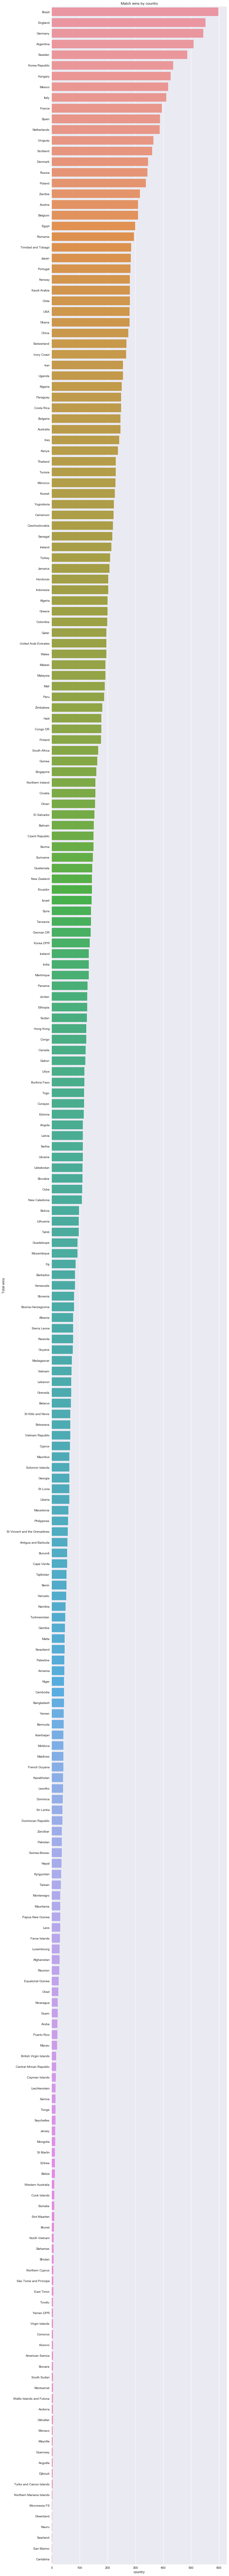

In [61]:
fig, ax = plt.subplots(figsize=(10, 150))
sns.set(font_scale=1)
sns.barplot(y = winners.index.tolist(), x = winners.tolist())
ax.set(xlabel='country', ylabel='Total wins')
ax.set_title('Match wins by country')

In [62]:
winners.describe(percentiles=[.01,.05,.95,.99])

count    239.000000
mean     124.581590
std      122.133866
min        1.000000
1%         1.000000
5%         3.000000
50%       83.000000
95%      367.200000
99%      530.700000
max      598.000000
Name: winner, dtype: float64

Text(0.5,1,'Total goals by country')

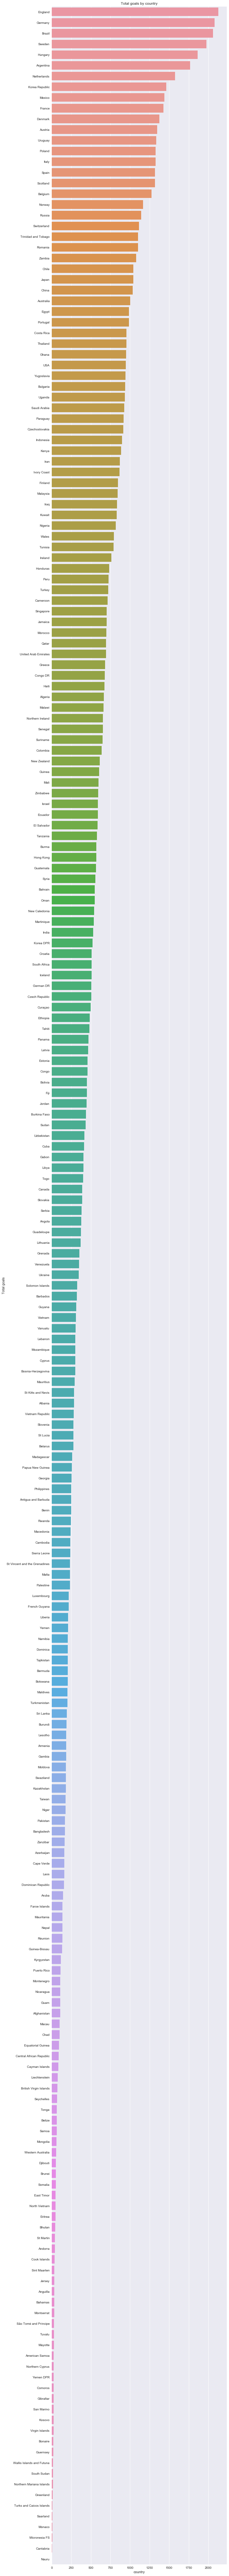

In [63]:
fig, ax = plt.subplots(figsize=(10, 150))
sns.set(font_scale=1)
sns.barplot(y = goals.index.tolist(), x = goals.tolist())
ax.set(xlabel='country', ylabel='Total goals')
ax.set_title('Total goals by country')

It is interesting that Brazil has scored less goals than England and Germany, but has won more games.  From the data you could pose that Brazil is the best team (for wins) or that England is the best team (for goals.)

# Dataset 2: STATA

# Cleaning Data

This is data pulled from an econometrics website on the consumption of pizza.

In [64]:
pizza = pd.read_stata("C:/Users/jperryman/Desktop/pizza.dta")

In [65]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 7 columns):
pizza      40 non-null int16
female     40 non-null int8
hs         40 non-null int8
college    40 non-null int8
grad       40 non-null int8
income     40 non-null float64
age        40 non-null int8
dtypes: float64(1), int16(1), int8(5)
memory usage: 920.0 bytes


The data is pretty clean already, but I want to drop the education variable for my data

In [66]:
del pizza['hs']
del pizza['college']
del pizza['grad']
pizza.head()

,pizza,female,income,age
0,109,1,19.5,25
1,0,1,39.0,45
2,0,1,15.6,20
3,108,1,26.0,28
4,220,1,19.5,25


Now that I have my variables I look for outliers in the income variable.

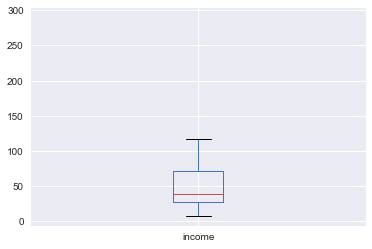

In [67]:
bbox = pizza['income'].plot(kind="box")

In [68]:
q_df = pizza.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,pizza,female,income,age
0.25,64.000,0.0,27.950,24.750
0.75,305.250,1.0,71.500,40.000
iqr,241.250,1.0,43.550,15.250
whisker_length,361.875,1.5,65.325,22.875
max_whisker,667.125,2.5,136.825,62.875
min_whisker,-297.875,-1.5,-37.375,1.875


# Describing Data

In [69]:
pizza.describe()

,pizza,female,income,age
count,40.000000,40.000000,40.000000,40.000000
mean,191.550000,0.525000,55.802500,33.475000
std,155.880617,0.505736,51.166137,10.253173
min,0.000000,0.000000,7.800000,18.000000
25%,64.000000,0.000000,27.950000,24.750000
50%,138.000000,1.000000,39.000000,32.000000
75%,305.250000,1.000000,71.500000,40.000000
max,590.000000,1.000000,288.600000,55.000000


I find that there are only 40 samples and that the data seems normally distributed.

In [70]:
pizza.corr()

,pizza,female,income,age
pizza,1.000000,-0.596690,0.368045,-0.216491
female,-0.596690,1.000000,-0.018582,-0.059215
income,0.368045,-0.018582,1.000000,0.468497
age,-0.216491,-0.059215,0.468497,1.000000


By looking for correlations I find that pizza consumption is correlated with gender, income, and possibly age.

In [71]:
pizza.describe(percentiles=[.01,.05,.95,.99])

,pizza,female,income,age
count,40.000000,40.000000,40.000000,40.000000
mean,191.550000,0.525000,55.802500,33.475000
std,155.880617,0.505736,51.166137,10.253173
min,0.000000,0.000000,7.800000,18.000000
1%,0.000000,0.000000,9.828000,18.780000
5%,0.000000,0.000000,13.000000,20.000000
50%,138.000000,1.000000,39.000000,32.000000
95%,428.450000,1.000000,119.730000,51.050000
99%,559.970000,1.000000,242.970000,53.830000
max,590.000000,1.000000,288.600000,55.000000


In [72]:
pd.pivot_table(pizza, values='pizza', index=['female','age'])

pizza
female age            
0      18   424.000000
       20   299.000000
       21   336.000000
       22   395.000000
       24   262.000000
       27   384.000000
       30   207.333333
       32   365.500000
       36   400.000000
       40   425.500000
       45   200.000000
       50   135.000000
       51    87.000000
       55   148.000000
1      20     0.000000
       21    53.000000
       22   262.000000
       23   239.000000
       25   164.500000
       28   108.000000
       30    85.000000
       32    63.000000
       35   189.000000
       36    25.500000
       40    89.333333
       45   134.333333
       52     0.000000

I created a pivot table to better see how age and gender affect pizza consumption.

# Vizualizing Data

Text(0.5,1,'Pizza cunsumption by gender')

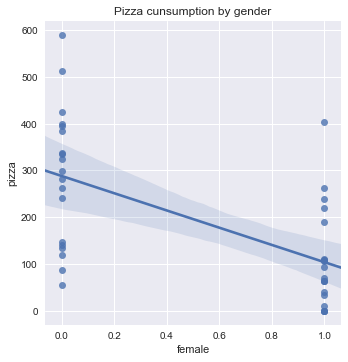

In [73]:
sns.lmplot(y="pizza", x="female", data=pizza)
ax = plt.gca()
ax.set_title("Pizza cunsumption by gender")

The data shows that males in this data set comsume more pizza on average.

Text(0.5,0.98,'pizza consumption compared to multiple variables')

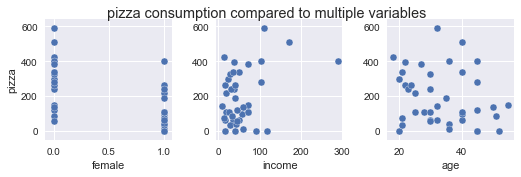

In [74]:
g = sns.pairplot(pizza,
x_vars=["female", "income", "age"],
y_vars=["pizza"])
plt.suptitle('pizza consumption compared to multiple variables')

By the graphs above and by the correlation command before we can see that gender has the greatest effect on pizza consumption.

# Dataset 3 TSV 

# Cleaning Data

This dataset uses imdb information about movies from the past 50 years.

In [75]:
import pandas as pd
movies = pd.read_table ('C:/Users/jperryman/Desktop/movies.txt', delimiter='\t')

In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [77]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


This dataset has a lot of variables that I do not want so I delete those columns.

In [78]:
del movies['color']
del movies['num_critic_for_reviews']
del movies['director_facebook_likes']
del movies['actor_3_facebook_likes']
del movies['actor_1_facebook_likes']
del movies['genres']
del movies['num_user_for_reviews']
del movies['language']
del movies['country']
del movies['actor_2_facebook_likes']
del movies['aspect_ratio']
del movies['movie_facebook_likes']
del movies['num_voted_users']
del movies['cast_total_facebook_likes']
del movies['plot_keywords']
del movies['movie_imdb_link']
movies.head()

,director_name,duration,actor_2_name,gross,actor_1_name,movie_title,actor_3_name,facenumber_in_poster,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,Wes Studi,0.0,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,0.0,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,Stephanie Sigman,1.0,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,0.0,PG-13,250000000.0,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,0.0,NaN,NaN,NaN,7.1


There is null information in the data set that I want to get rid of.  I drop the data using dropna()

In [79]:
movie = movies.dropna()

I am also curious about what directo has made the most movies, so I create a new list.

In [80]:
director = pd.value_counts(movie.director_name)

# Describing Data

In [81]:
movie.head()

,director_name,duration,actor_2_name,gross,actor_1_name,movie_title,actor_3_name,facenumber_in_poster,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,Wes Studi,0.0,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,0.0,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,Stephanie Sigman,1.0,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,0.0,PG-13,250000000.0,2012.0,8.5
5,Andrew Stanton,132.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,Polly Walker,1.0,PG-13,263700000.0,2012.0,6.6


by using .head I am able to see that Steven Spielberg has directed the most movies in hollywood.

In [82]:
director.head(10)

Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Steven Soderbergh    16
Martin Scorsese      16
Tim Burton           16
Spike Lee            15
Renny Harlin         15
Robert Rodriguez     13
Name: director_name, dtype: int64

By describing the data I am able to see that the average director only directs 2 films.  This fact alone makes directing 25 movies more impressive.

In [83]:
director.describe()

count    1706.000000
mean        2.243845
std         2.277077
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        25.000000
Name: director_name, dtype: float64

By using .corr I am able to see that the length of a movie is correlated with its imdb score.

In [84]:
movie.corr()

,duration,gross,facenumber_in_poster,budget,title_year,imdb_score
duration,1.000000,0.250809,0.026391,0.069602,-0.131100,0.365578
gross,0.250809,1.000000,-0.030693,0.101369,0.048215,0.215564
facenumber_in_poster,0.026391,-0.030693,1.000000,-0.021577,0.071614,-0.067166
budget,0.069602,0.101369,-0.021577,1.000000,0.045207,0.029885
title_year,-0.131100,0.048215,0.071614,0.045207,1.000000,-0.135793
imdb_score,0.365578,0.215564,-0.067166,0.029885,-0.135793,1.000000


In [85]:
movie.describe

<bound method NDFrame.describe of            director_name  duration          actor_2_name        gross  \
0          James Cameron     178.0      Joel David Moore  760505847.0   
1         Gore Verbinski     169.0         Orlando Bloom  309404152.0   
2             Sam Mendes     148.0          Rory Kinnear  200074175.0   
3      Christopher Nolan     164.0        Christian Bale  448130642.0   
5         Andrew Stanton     132.0       Samantha Morton   73058679.0   
6              Sam Raimi     156.0          James Franco  336530303.0   
7           Nathan Greno     100.0          Donna Murphy  200807262.0   
8            Joss Whedon     141.0     Robert Downey Jr.  458991599.0   
9            David Yates     153.0      Daniel Radcliffe  301956980.0   
10           Zack Snyder     183.0          Lauren Cohan  330249062.0   
11          Bryan Singer     169.0         Marlon Brando  200069408.0   
12          Marc Forster     106.0       Mathieu Amalric  168368427.0   
13        Gore Ve

In [86]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828 entries, 0 to 5042
Data columns (total 12 columns):
director_name           3828 non-null object
duration                3828 non-null float64
actor_2_name            3828 non-null object
gross                   3828 non-null float64
actor_1_name            3828 non-null object
movie_title             3828 non-null object
actor_3_name            3828 non-null object
facenumber_in_poster    3828 non-null float64
content_rating          3828 non-null object
budget                  3828 non-null float64
title_year              3828 non-null float64
imdb_score              3828 non-null float64
dtypes: float64(6), object(6)
memory usage: 388.8+ KB


By breaking up the variables into percentiles I am able to see that imdb scores rarely surpass 8.5 and that the longest movie is 330 minutes.

In [87]:
movie.describe(percentiles=[.01,.05,.95,.99])

,duration,gross,facenumber_in_poster,budget,title_year,imdb_score
count,3828.000000,3.828000e+03,3828.000000,3.828000e+03,3828.000000,3828.000000
mean,110.011494,5.169443e+07,1.379310,4.547710e+07,2003.069488,6.459143
std,22.563313,6.998174e+07,2.041971,2.239456e+08,9.881576,1.057539
min,37.000000,1.620000e+02,0.000000,2.180000e+02,1927.000000,1.600000
1%,78.000000,1.323093e+04,0.000000,1.600000e+05,1965.270000,3.300000
5%,85.000000,1.432286e+05,0.000000,1.000000e+06,1985.350000,4.600000
50%,106.000000,2.885415e+07,1.000000,2.500000e+07,2005.000000,6.600000
95%,148.000000,1.841466e+08,5.000000,1.400000e+08,2015.000000,8.000000
99%,191.460000,3.363951e+08,8.000000,2.100000e+08,2016.000000,8.500000
max,330.000000,7.605058e+08,43.000000,1.221550e+10,2016.000000,9.300000


Here I use a pivot table to see how percieved movie quality (imdb score) has changed over time.

In [88]:
pd.pivot_table(movie, values='imdb_score', index=['title_year'])

,imdb_score
title_year,
1927.0,8.300000
1929.0,6.300000
1933.0,7.700000
1935.0,7.800000
1936.0,8.600000
1937.0,7.700000
1939.0,8.150000
1940.0,7.500000
1946.0,7.500000


# Vizualizing Data

The first graph show that on average better movies tend to make more money in the box office.

Text(0.5,1,'Revenue by quality')

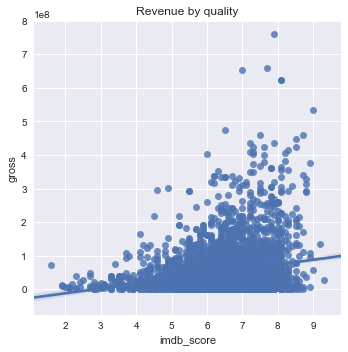

In [89]:
sns.lmplot(y="gross", x="imdb_score", data=movie)
ax = plt.gca()
ax.set_title("Revenue by quality")

In [90]:
Using a pair plot I can see that while duration may increase an imdb score it can also hurt gross revenue.

SyntaxError: invalid syntax (<ipython-input-90-c6e27623da90>, line 1)

Text(0.5,0.98,'General movie trends')

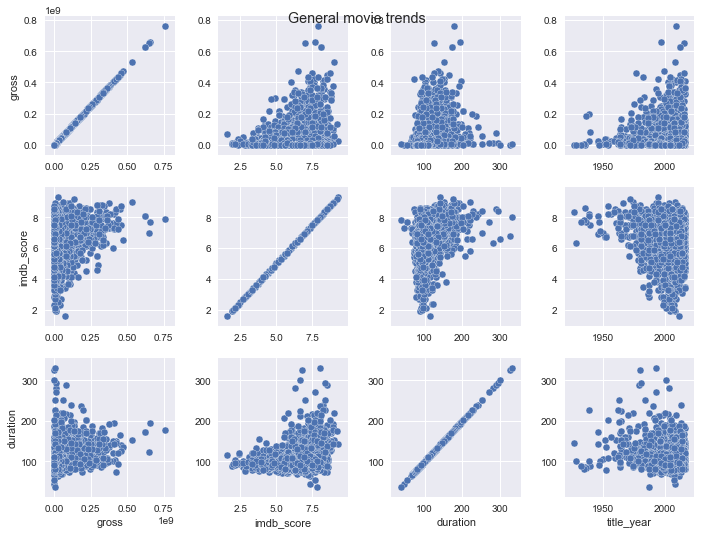

In [91]:
g = sns.pairplot(movie,
x_vars=["gross", "imdb_score", "duration", "title_year"],
y_vars=["gross", "imdb_score", "duration"])
plt.suptitle('General movie trends')

Finally, the most interesting graph to me, quality over time.  According to the data movies have gotten worse on average over time.

Text(0.5,1,'Quality over time')

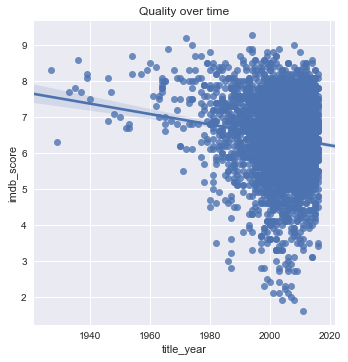

In [92]:
sns.lmplot(y="imdb_score", x="title_year", data=movie)
ax = plt.gca()
ax.set_title("Quality over time")

I hope you enjoyed my project

In [95]:
echo "# Homework-1" >> README.md
git init
git add README.md
git commit -m "first commit"
git remote add origin https://github.com/jperryman94/Homework-1.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-95-057537f915f1>, line 1)